In [ ]:
## Beginning

In [1]:
%matplotlib inline
import matplotlib
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import numpy as np     # This is for general numerical operations 
import seaborn as sns  # This allows us to efficiently and beautifully plot
import networkx as nx  
import osmnx as ox
import statsmodels.api as sm
import matplotlib.pyplot as plt

# display settings (optional)
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

In [3]:
#for the import process, next step is to create a string variable containing the directory of the file and a file name variable
infodir = r'C:\Users\EPRO\OneDrive - Wageningen University & Research\Course Channel Metropolitan Challenges 2025 - Paper Group 6 Parking space vs Food Space'
fname = infodir + r'\data\buurten_filtered.csv'

gpdf01 = pd.read_csv(fname)
#this is to verify
gpdf01.head()

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
0,117.0,AA01 Planciusbuurt-Noord,A,202403-202404,doordeweeks avond,55.0,52.0,3.0,0.0,55.0,95.0,100.0,"POLYGON((4.8857454 52.3881665,4.8844789 52.388...","POLYGON((52.3881665 4.8857454,52.3883785 4.884...",4.884390,52.387023
1,118.0,AA02 Westelijke eilanden,A,202403-202404,doordeweeks avond,313.0,287.0,9.0,0.0,296.0,92.0,95.0,"POLYGON((4.8910092 52.3884398,4.8859714 52.388...","POLYGON((52.3884398 4.8910092,52.3881287 4.885...",4.887548,52.385401
2,119.0,AA03 Westerdokseiland,A,202403-202404,doordeweeks avond,165.0,76.0,0.0,0.0,76.0,46.0,46.0,"POLYGON((4.8950776 52.3886909,4.8923612 52.388...","POLYGON((52.3886909 4.8950776,52.3885233 4.892...",4.894474,52.384417
3,120.0,AA04 Planciusbuurt-Zuid,A,202403-202404,doordeweeks avond,20.0,15.0,1.0,0.0,16.0,75.0,80.0,"POLYGON((4.8839232 52.385505,4.884072 52.38566...","POLYGON((52.385505 4.8839232,52.3856666 4.8840...",4.882867,52.384947
4,121.0,AA05 Haarlemmerbuurt-West,A,202403-202404,doordeweeks avond,148.0,141.0,4.0,0.0,145.0,95.0,98.0,"POLYGON((4.8839232 52.385505,4.8835118 52.3849...","POLYGON((52.385505 4.8839232,52.3849538 4.8835...",4.886377,52.383013


In [5]:
gpdf01_1 = gpdf01[gpdf01['Dagdeel'] == 'doordeweeksavond']
before = len(gpdf01)
after = len(gpdf01_1)
print(f"Rows before: {before}, after: {after}, dropped: {before - after}")

Rows before: 1447, after: 0, dropped: 1447


In [14]:
gpdf01["AA_buurten"] = gpdf01["BRT"].str[:2]
df_avg = gpdf01_1.groupby("AA_buurten", as_index=False).mean(numeric_only=True)
df_avg.head(10)

,AA_buurten,OBJECTNUMMER,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,LNG,LAT
0,AA,151.500,135.250000,107.750000,4.166667,0.0,111.916667,78.333333,81.666667,4.887962,52.384230
1,AB,160.000,144.318182,116.136364,1.454545,0.0,117.590909,81.136364,82.318182,4.880027,52.374351
2,AC,167.500,222.750000,186.375000,0.875000,0.0,187.250000,85.125000,85.250000,4.887063,52.373264
3,AD,252.125,25.625000,20.937500,1.187500,0.0,22.125000,5585.812500,5587.250000,4.893645,52.374255
4,AE,196.900,24.500000,20.200000,1.500000,0.0,21.700000,957.900000,964.600000,4.896888,52.372574
5,AF,183.000,83.611111,62.333333,3.222222,0.0,65.555556,71.277778,75.222222,4.904784,52.371775
6,AG,190.500,144.083333,117.750000,1.000000,0.0,118.750000,78.916667,80.666667,4.892159,52.365177
7,AH,197.500,118.125000,99.875000,1.500000,0.0,101.375000,80.000000,81.125000,4.889498,52.362195
8,AJ,203.500,337.000000,252.250000,3.500000,0.0,255.750000,73.250000,74.000000,4.912912,52.363930
9,AK,209.500,240.750000,177.812500,0.937500,0.0,178.750000,75.250000,75.750000,4.923073,52.370187


In [5]:
display(gpdf01.describe(include="all"))
gpdf01.isna().sum()

,OBJECTNUMMER,BRT,SDC,Periode,Dagdeel,Cap_open,Bez_open,Fout,Object,Bez_tot,Netto_PKD,Bruto_PKD,WKT_LNG_LAT,WKT_LAT_LNG,LNG,LAT
count,1040.000000,1040,1040,1040,1040,1040.000000,1040.000000,1040.000000,1040.0,1040.000000,1040.000000,1040.000000,1040,1040,1040.000000,1040.000000
unique,NaN,518,9,11,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,518,518,NaN,NaN
top,NaN,KE05 Hemonybuurt,K,202502-202503,doordeweeks avond,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON((4.9046291 52.3592107,4.9039954 52.359...","POLYGON((52.3592107 4.9046291,52.3590474 4.903...",NaN,NaN
freq,NaN,3,156,148,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,NaN,NaN
mean,936.325000,NaN,NaN,NaN,NaN,445.158654,284.215385,7.900000,0.0,292.115385,504.082692,507.142308,NaN,NaN,4.900794,52.361379
std,494.365331,NaN,NaN,NaN,NaN,437.495208,283.502098,16.256711,0.0,292.235383,1924.451709,1923.891491,NaN,NaN,0.060459,0.028383
min,117.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,NaN,NaN,4.744513,52.286047
25%,532.750000,NaN,NaN,NaN,NaN,117.000000,54.750000,0.000000,0.0,58.000000,52.000000,53.000000,NaN,NaN,4.861287,52.346979
50%,891.500000,NaN,NaN,NaN,NaN,314.000000,199.500000,3.000000,0.0,206.500000,68.000000,70.000000,NaN,NaN,4.893729,52.363624
75%,1363.250000,NaN,NaN,NaN,NaN,661.000000,448.500000,8.000000,0.0,455.250000,82.250000,84.000000,NaN,NaN,4.939503,52.380840


OBJECTNUMMER    407
BRT             407
SDC             407
Periode         407
Dagdeel         407
Cap_open        407
Bez_open        407
Fout            407
Object          407
Bez_tot         407
Netto_PKD       407
Bruto_PKD       407
WKT_LNG_LAT     407
WKT_LAT_LNG     407
LNG             407
LAT             407
dtype: int64

TypeError: 'value' must be an instance of str or bytes, not a float

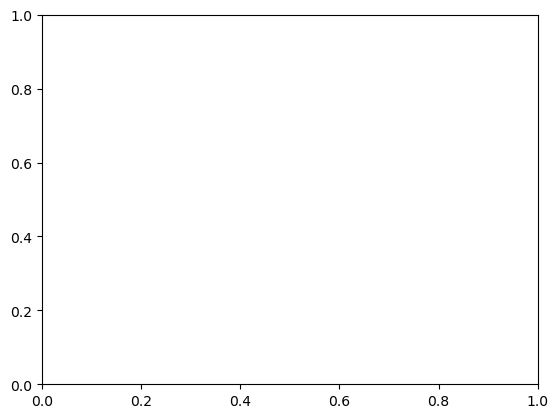

In [6]:
plt.figure()
plt.plot(gpdf01["Periode"], gpdf01["Netto_PKD"])
plt.xlabel("Date")
plt.ylabel("Daily parking pressure on evenings rate")
plt.title("Amsterdam parking pressure over time")
plt.show()

In [7]:
gpdf01["Periode"].dtype

dtype('O')

In [11]:
gpdf01["Periode"] = gpdf01["Periode"].fillna("").astype(str)

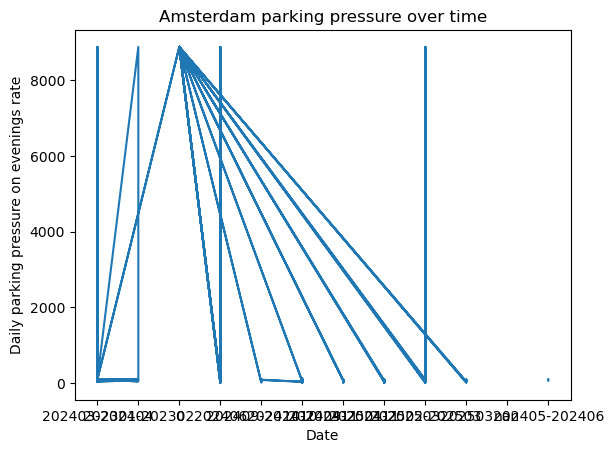

In [12]:
plt.figure()
plt.plot(gpdf01["Periode"], gpdf01["Netto_PKD"])
plt.xlabel("Date")
plt.ylabel("Daily parking pressure on evenings rate")
plt.title("Amsterdam parking pressure over time")
plt.show()

In [ ]:
# 1) Add constant
X = sm.add_constant(gpdf01[["tmax"]])
y = gpdf01["bikes"]

# 2) Fit model
model_simple = sm.OLS(y, X).fit()

# 3) Inspect results
print(model_simple.summary())
